# Infant Cry Classification - Multiple Model Comparison
## Training and comparing different ML models for infant cry classification

## 1. Import Libraries

In [ ]:
# Install required packages (run once)
# !pip install pandas numpy scikit-learn matplotlib seaborn xgboost lightgbm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Import models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings('ignore')

# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 2. Load and Explore Data

In [2]:
# Load the dataset - UPDATE THIS PATH
filepath = r'C:\Users\ADMIN\Downloads\Cry classification\donateacry-corpus_features_final.csv'
df = pd.read_csv(filepath)

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")

Dataset loaded successfully!
Shape: (457, 27)


In [ ]:
# Display basic information
print("First few rows:")
display(df.head())

print("\nDataset Info:")
print(df.info())

In [3]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

print("\nStatistical summary:")
display(df.describe())

Missing values:
Cry_Audio_File             0
Cry_Reason                 0
Amplitude_Envelope_Mean    0
RMS_Mean                   0
ZCR_Mean                   0
STFT_Mean                  0
SC_Mean                    0
SBAN_Mean                  0
SCON_Mean                  0
MFCCs13Mean                0
delMFCCs13                 0
del2MFCCs13                0
MelSpec                    0
MFCCs20                    0
MFCCs1                     0
MFCCs2                     0
MFCCs3                     0
MFCCs4                     0
MFCCs5                     0
MFCCs6                     0
MFCCs7                     0
MFCCs8                     0
MFCCs9                     0
MFCCs10                    0
MFCCs11                    0
MFCCs12                    0
MFCCs13                    0
dtype: int64

Statistical summary:


,Cry_Reason,Amplitude_Envelope_Mean,RMS_Mean,ZCR_Mean,STFT_Mean,SC_Mean,SBAN_Mean,SCON_Mean,MFCCs13Mean,delMFCCs13,del2MFCCs13,MelSpec,MFCCs20,MFCCs1,MFCCs2,MFCCs3,MFCCs4,MFCCs5,MFCCs6,MFCCs7,MFCCs8,MFCCs9,MFCCs10,MFCCs11,MFCCs12,MFCCs13
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,2.853392,0.051791,0.020425,0.094088,0.723645,1208.523108,559.457103,26.671653,-43.967221,0.022727,0.006772,-48.291602,-28.850540,-553.209039,70.686838,-30.499793,-7.307247,3.079386,-20.502881,-5.854443,0.473949,-11.543065,-3.475046,-2.497942,-9.310533,-1.614054
std,0.690120,0.041558,0.017054,0.027277,1.006595,271.103944,102.135948,2.575177,6.841562,0.047546,0.019035,8.228827,4.514485,93.825916,23.687382,23.180578,10.923159,8.798856,10.730721,7.375883,6.896061,6.860347,4.733299,4.547237,5.577711,5.021888
min,0.000000,0.000504,0.000187,0.032646,0.000098,548.434286,272.392864,15.047119,-72.727020,-0.183833,-0.059037,-83.328670,-48.245860,-948.017330,14.473028,-120.802320,-43.843983,-30.563550,-63.192590,-30.035845,-27.879177,-36.286797,-18.108528,-15.889749,-26.518278,-17.633327
25%,3.000000,0.018715,0.006875,0.073336,0.082990,1015.656760,489.157994,25.311626,-47.374424,-0.000840,-0.001394,-53.269830,-31.294615,-607.532170,54.180870,-44.352074,-14.493466,-2.053473,-26.675592,-10.059641,-3.608023,-15.987158,-6.185523,-5.088930,-12.936294,-4.611650
50%,3.000000,0.040515,0.016071,0.092543,0.405277,1191.004789,556.808083,26.858780,-43.148422,0.016583,0.003681,-46.455116,-28.164505,-532.508540,70.830040,-27.455803,-6.580308,2.527661,-19.334597,-5.225519,1.178230,-10.590963,-3.436787,-2.587998,-9.256982,-2.138481
75%,3.000000,0.073548,0.029639,0.111112,0.967362,1380.717187,619.867157,28.478680,-39.422800,0.055784,0.016670,-42.634445,-25.686990,-488.768800,86.930930,-12.689830,0.084312,8.268372,-12.847409,-1.005567,4.518138,-6.204217,-0.933123,-0.123325,-5.530221,0.247652
max,4.000000,0.212100,0.096381,0.183001,10.033285,2141.501864,943.655821,33.956149,-25.652435,0.178555,0.073576,-33.529080,-18.599277,-383.897430,158.473790,16.098083,22.073395,31.169401,4.206708,12.477965,27.120880,4.719126,17.416044,22.357973,14.592967,19.876127


Cry Reason Distribution:
Cry_Reason
3    382
2     27
4     24
0     16
1      8
Name: count, dtype: int64


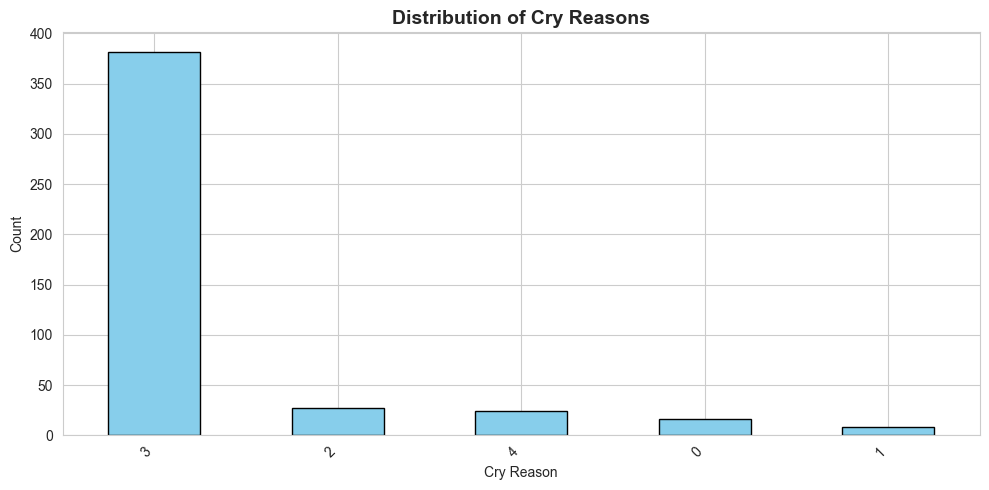

In [4]:
# Analyze target variable
print("Cry Reason Distribution:")
print(df['Cry_Reason'].value_counts())

# Visualize distribution
plt.figure(figsize=(10, 5))
df['Cry_Reason'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Cry Reasons', fontsize=14, fontweight='bold')
plt.xlabel('Cry Reason')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3. Data Preparation

In [5]:
# Drop audio file column (not a feature)
if 'Cry_Audio_File' in df.columns:
    df_clean = df.drop('Cry_Audio_File', axis=1)
else:
    df_clean = df.copy()

# Separate features and target
X = df_clean.drop('Cry_Reason', axis=1)
y = df_clean['Cry_Reason']

print(f"Features: {X.shape[1]}")
print(f"Samples: {X.shape[0]}")
print(f"\nFeature columns: {X.columns.tolist()}")

Features: 25
Samples: 457

Feature columns: ['Amplitude_Envelope_Mean', 'RMS_Mean', 'ZCR_Mean', 'STFT_Mean', 'SC_Mean', 'SBAN_Mean', 'SCON_Mean', 'MFCCs13Mean', 'delMFCCs13', 'del2MFCCs13', 'MelSpec', 'MFCCs20', 'MFCCs1', 'MFCCs2', 'MFCCs3', 'MFCCs4', 'MFCCs5', 'MFCCs6', 'MFCCs7', 'MFCCs8', 'MFCCs9', 'MFCCs10', 'MFCCs11', 'MFCCs12', 'MFCCs13']


In [6]:
# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Label Encoding:")
for label, encoded in zip(le.classes_, le.transform(le.classes_)):
    print(f"  {label} → {encoded}")

Label Encoding:
  0 → 0
  1 → 1
  2 → 2
  3 → 3
  4 → 4


In [7]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"\nSplit ratio: {80}% train / {20}% test")

Training set: 365 samples
Testing set: 92 samples

Split ratio: 80% train / 20% test


In [8]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled using StandardScaler")
print(f"\nOriginal feature range (sample): {X_train.iloc[0, 0]:.4f}")
print(f"Scaled feature range (sample): {X_train_scaled[0, 0]:.4f}")

✅ Features scaled using StandardScaler

Original feature range (sample): 0.0143
Scaled feature range (sample): -0.9637


## 4. Train Multiple Models

In [9]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, eval_metric='mlogloss'),
    'LightGBM': LGBMClassifier(n_estimators=100, random_state=42, verbose=-1),
    'SVM': SVC(kernel='rbf', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42)
}

print(f"Prepared {len(models)} models for training:")
for name in models.keys():
    print(f"  - {name}")

Prepared 10 models for training:
  - Logistic Regression
  - Decision Tree
  - Random Forest
  - Gradient Boosting
  - XGBoost
  - LightGBM
  - SVM
  - KNN
  - Naive Bayes
  - AdaBoost


In [10]:
# Train and evaluate all models
results = {}

for name, model in models.items():
    print(f"\n{'='*70}")
    print(f"Training {name}...")
    print(f"{'='*70}")
    
    # Train
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred
    }
    
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"CV Score:  {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

print("\n✅ All models trained successfully!")


Training Logistic Regression...
Accuracy:  0.7935
Precision: 0.6943
Recall:    0.7935
F1-Score:  0.7406
CV Score:  0.8192 (+/- 0.0182)

Training Decision Tree...
Accuracy:  0.6196
Precision: 0.6953
Recall:    0.6196
F1-Score:  0.6542
CV Score:  0.6658 (+/- 0.0531)

Training Random Forest...
Accuracy:  0.8152
Precision: 0.6975
Recall:    0.8152
F1-Score:  0.7518
CV Score:  0.8301 (+/- 0.0067)

Training Gradient Boosting...
Accuracy:  0.7935
Precision: 0.6943
Recall:    0.7935
F1-Score:  0.7406
CV Score:  0.8082 (+/- 0.0087)

Training XGBoost...
Accuracy:  0.8261
Precision: 0.6990
Recall:    0.8261
F1-Score:  0.7572
CV Score:  0.8301 (+/- 0.0110)

Training LightGBM...
Accuracy:  0.8370
Precision: 0.7005
Recall:    0.8370
F1-Score:  0.7627
CV Score:  0.8301 (+/- 0.0110)

Training SVM...
Accuracy:  0.8370
Precision: 0.7005
Recall:    0.8370
F1-Score:  0.7627
CV Score:  0.8356 (+/- 0.0000)

Training KNN...
Accuracy:  0.8043
Precision: 0.6959
Recall:    0.8043
F1-Score:  0.7462
CV Score:  0

## 5. Compare Model Performance

In [11]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1-Score': [results[m]['f1_score'] for m in results.keys()],
    'CV Score': [results[m]['cv_mean'] for m in results.keys()],
    'CV Std': [results[m]['cv_std'] for m in results.keys()]
})

comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

print("\n" + "="*90)
print("MODEL COMPARISON SUMMARY")
print("="*90)
display(comparison_df.style.background_gradient(cmap='Greens', subset=['Accuracy', 'F1-Score']))


MODEL COMPARISON SUMMARY


,Model,Accuracy,Precision,Recall,F1-Score,CV Score,CV Std
6,SVM,0.836957,0.700496,0.836957,0.762670,0.835616,0.000000
5,LightGBM,0.836957,0.700496,0.836957,0.762670,0.830137,0.010959
4,XGBoost,0.826087,0.698997,0.826087,0.757246,0.830137,0.010959
2,Random Forest,0.815217,0.697464,0.815217,0.751757,0.830137,0.006711
7,KNN,0.804348,0.695896,0.804348,0.746202,0.810959,0.015975
0,Logistic Regression,0.793478,0.694293,0.793478,0.740580,0.819178,0.018173
3,Gradient Boosting,0.793478,0.694293,0.793478,0.740580,0.808219,0.008664
9,AdaBoost,0.782609,0.692654,0.782609,0.734889,0.794521,0.027397
8,Naive Bayes,0.652174,0.747930,0.652174,0.694509,0.695890,0.064485
1,Decision Tree,0.619565,0.695297,0.619565,0.654241,0.665753,0.053125


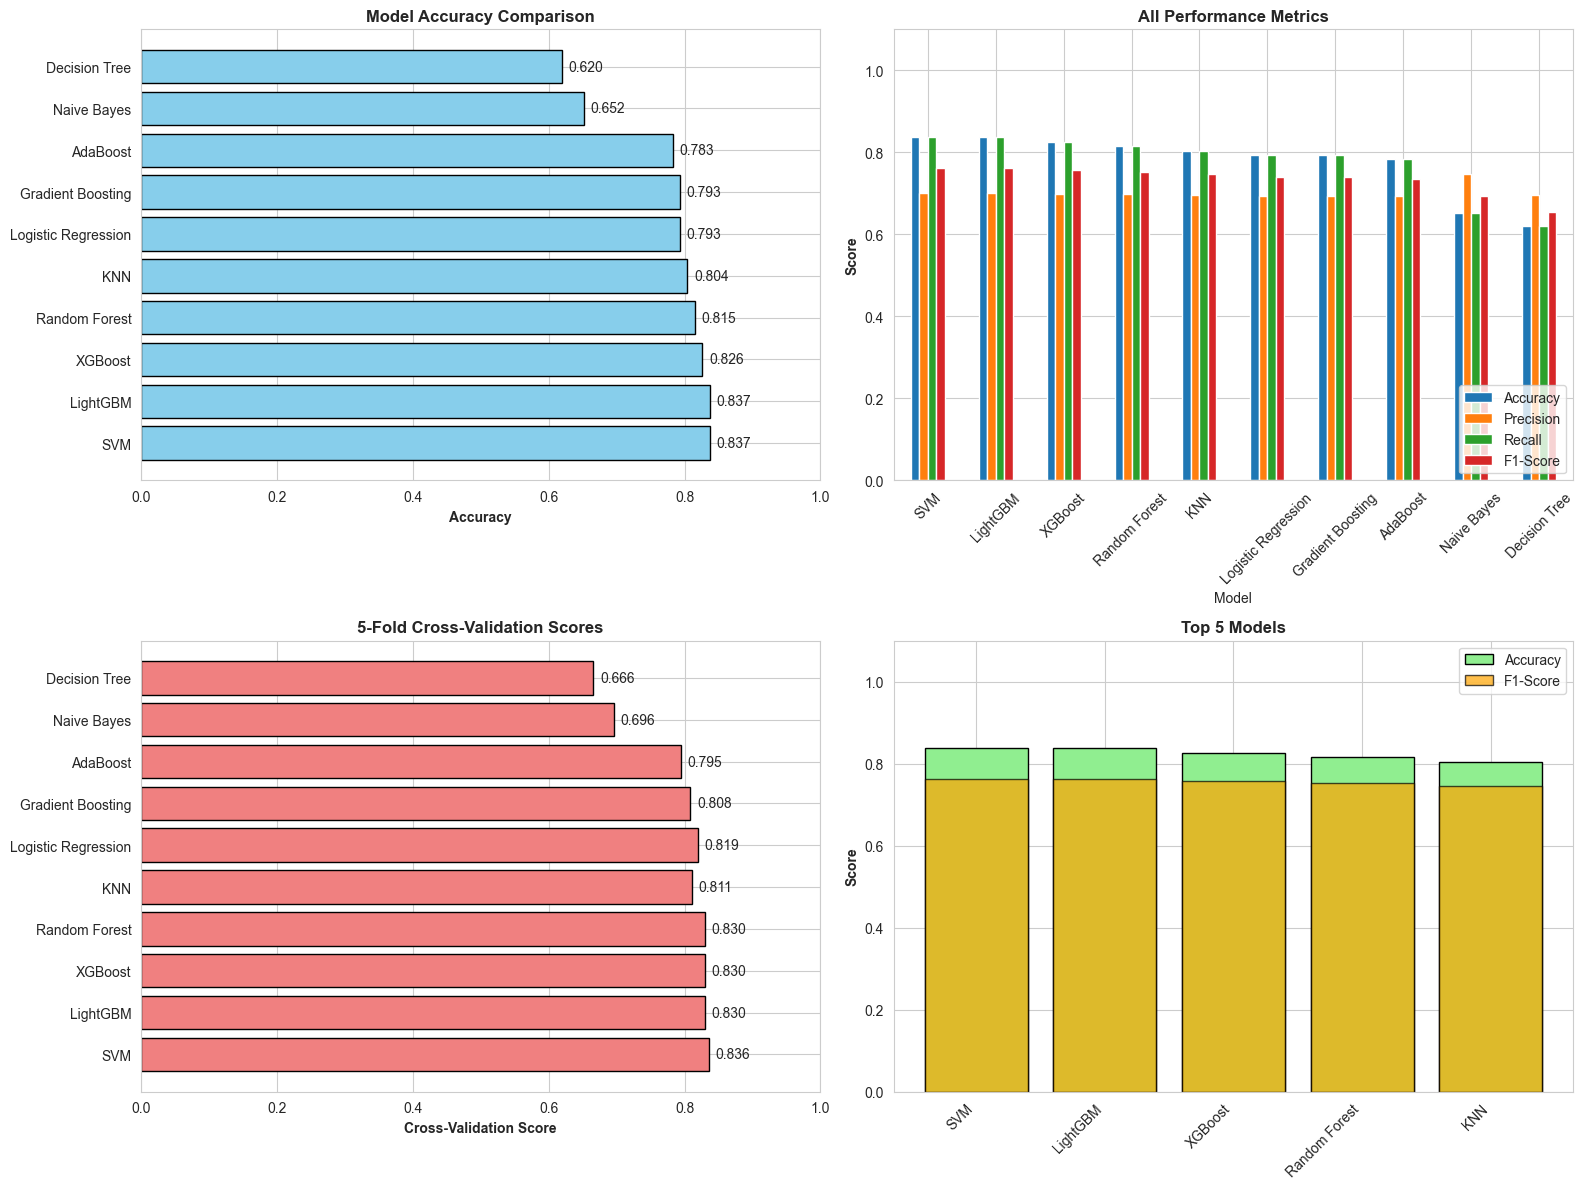

In [12]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Accuracy comparison
axes[0, 0].barh(comparison_df['Model'], comparison_df['Accuracy'], color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Accuracy', fontweight='bold')
axes[0, 0].set_title('Model Accuracy Comparison', fontsize=12, fontweight='bold')
axes[0, 0].set_xlim(0, 1)
for i, v in enumerate(comparison_df['Accuracy']):
    axes[0, 0].text(v + 0.01, i, f'{v:.3f}', va='center')

# Plot 2: All metrics comparison
metrics_df = comparison_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']]
metrics_df.plot(kind='bar', ax=axes[0, 1], rot=45)
axes[0, 1].set_title('All Performance Metrics', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Score', fontweight='bold')
axes[0, 1].set_ylim(0, 1.1)
axes[0, 1].legend(loc='lower right')

# Plot 3: Cross-validation scores
axes[1, 0].barh(comparison_df['Model'], comparison_df['CV Score'], 
                color='lightcoral', edgecolor='black')
axes[1, 0].set_xlabel('Cross-Validation Score', fontweight='bold')
axes[1, 0].set_title('5-Fold Cross-Validation Scores', fontsize=12, fontweight='bold')
axes[1, 0].set_xlim(0, 1)
for i, v in enumerate(comparison_df['CV Score']):
    axes[1, 0].text(v + 0.01, i, f'{v:.3f}', va='center')

# Plot 4: Top 5 models
top_5 = comparison_df.head(5)
x_pos = np.arange(len(top_5))
axes[1, 1].bar(x_pos, top_5['Accuracy'], color='lightgreen', edgecolor='black', label='Accuracy')
axes[1, 1].bar(x_pos, top_5['F1-Score'], color='orange', alpha=0.7, edgecolor='black', label='F1-Score')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(top_5['Model'], rotation=45, ha='right')
axes[1, 1].set_ylabel('Score', fontweight='bold')
axes[1, 1].set_title('Top 5 Models', fontsize=12, fontweight='bold')
axes[1, 1].set_ylim(0, 1.1)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

## 6. Detailed Analysis of Best Model

In [13]:
# Get best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['predictions']

print(f"🏆 Best Model: {best_model_name}")
print(f"   Accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"   F1-Score: {results[best_model_name]['f1_score']:.4f}")
print(f"   CV Score: {results[best_model_name]['cv_mean']:.4f}")

🏆 Best Model: SVM
   Accuracy: 0.8370
   F1-Score: 0.7627
   CV Score: 0.8356


In [14]:
# Classification report for best model
print(f"\nClassification Report - {best_model_name}:")
print("="*70)
print(classification_report(y_test, best_predictions, target_names=le.classes_))


Classification Report - SVM:


TypeError: object of type 'numpy.int64' has no len()

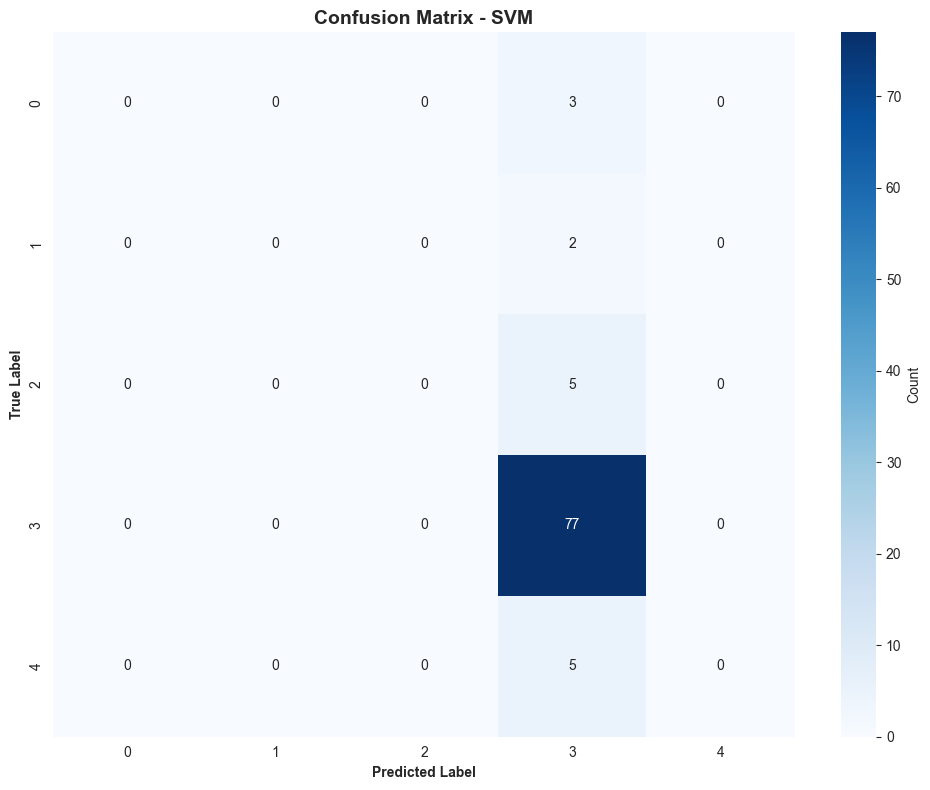

In [15]:
# Confusion matrix for best model
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cbar_kws={'label': 'Count'})
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontweight='bold')
plt.xlabel('Predicted Label', fontweight='bold')
plt.tight_layout()
plt.show()

## 7. Feature Importance (if applicable)

In [16]:
# Feature importance for tree-based models
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print(f"\nTop 10 Most Important Features for {best_model_name}:")
    display(feature_importance.head(10))
    
    # Plot feature importance
    plt.figure(figsize=(12, 6))
    plt.barh(feature_importance['Feature'].head(10), 
             feature_importance['Importance'].head(10),
             color='teal', edgecolor='black')
    plt.xlabel('Importance', fontweight='bold')
    plt.title(f'Top 10 Feature Importances - {best_model_name}', fontsize=12, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print(f"\n{best_model_name} does not provide feature importance.")


SVM does not provide feature importance.


## 8. Save Best Model

In [ ]:
import joblib

# Save the best model
model_filename = f'best_model_{best_model_name.replace(" ", "_").lower()}.pkl'
joblib.dump(best_model, model_filename)
print(f"✅ Best model saved as: {model_filename}")

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')
print(f"✅ Scaler saved as: scaler.pkl")

# Save label encoder
joblib.dump(le, 'label_encoder.pkl')
print(f"✅ Label encoder saved as: label_encoder.pkl")

## 9. Summary

In [17]:
print("\n" + "="*90)
print("FINAL SUMMARY")
print("="*90)
print(f"\n✅ Trained and evaluated {len(models)} different models")
print(f"🏆 Best performing model: {best_model_name}")
print(f"📊 Best accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"📈 Best F1-score: {results[best_model_name]['f1_score']:.4f}")
print(f"\n💾 Model, scaler, and label encoder saved for future use")
print(f"\n📋 Top 3 Models:")
for i, row in comparison_df.head(3).iterrows():
    print(f"   {i+1}. {row['Model']}: {row['Accuracy']:.4f}")


FINAL SUMMARY

✅ Trained and evaluated 10 different models
🏆 Best performing model: SVM
📊 Best accuracy: 0.8370
📈 Best F1-score: 0.7627

💾 Model, scaler, and label encoder saved for future use

📋 Top 3 Models:
   7. SVM: 0.8370
   6. LightGBM: 0.8370
   5. XGBoost: 0.8261
